=================================================

### Milestone 1

Nama  : Nakia Melvana

Batch : RMT-026

**Program ini dibuat untuk menganalisis bagaimana peluang penjualan barang fashion di beberapa Negara.**

=================================================

# LINK DASHBOARD TABLEAU:
- https://public.tableau.com/views/M1_DB1_Nakia-Melvana/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

# Identifikasi Masalah

Seorang client ingin ekspansi bisnisnya, yaitu brand X, dengan kategori fashion ke mancanegara. Dalam hal ini, client tidak yakin dengan peluang penjualan fashion itemnya sehingga diperlukan analisis *consumer behavior*, target market, dan preferensi fashion item berdasarkan season untuk beberapa negara. Hal ini bertujuan untuk mengetahui fashion item yang memiliki peluang penjualan tinggi, negara yang berpeluang untuk menghasilkan profit besar, target market, dan faktor lainnya yang memengaruhi pembelian fashion item. 

**SMART ANALYSIS:**
1. Spesific: Menaikkan sales brand X di negara tujuan.
2. Measureable: Menaikkan sales minimal sebesar 95% dari sales di toko Indonesia
3. Achieveable: Menjual fashion item sesuai dengan preferensi dari target market.
4. Relevant: kesesuian fashion item yang dijual pada musim tertentu memengaruhi sales.
5. Time-bound: Goal dicapai dalam kurun waktu 6 bulan. 

**Problem statement:**

Menaikkan sales minimal sebesar 95% dari sales di toko Indonesia dengan cara menyediakan fashion item yang sesuai dengan preferensi target market yang akan dicapai dalam kurun waktu 6 bulan.

**Tujuan:**
- Mengetahui negara mana yang sangat antusias untuk belanja fashion items 
- Mengetahui target market yang memiliki peluang retention tinggi
- Mengetahui Target Market yang Memiliki Purchase Amount (USD) Tertinggi
- Mengetahui preferensi fashion item
- Mengetahui apakah membership memengaruhi seringnya pembelian item

**5W+1H ANALYSIS:**
- Di negara mana penjualan fashion item dengan high customer value?
- Siapa yang memiiki peluang retention tinggi dilihat dari gender?
- Siapa yang memiliki kecenderungan berbelanja fashion item yang tinggi dilihat dari age group dan gender?
- Ukuran dan warna apa yang paling sering di pilih oleh customer dalam belanja fashion item?
- Fashion item dan kategori apa yang paling banyak terjual di setiap musim?
- Siapa target market setiap category fashion yang ditinjau dari gender?
- Apakah membership memengaruhi frekuensi pembelian item?

# Data Loading

Source: https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset/data

In [22]:
''' 
pada bagian ini diharuskan untuk import file csv dataset menggunakan pandas untuk diolah
'''
import pandas as pd
# import file csv
df = pd.read_csv('shopping_behavior_updated.csv')
# menampilkan data lima teratas 
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [23]:
# cek summary dari data untuk memastikan kesesuaian dataset, missing value, dan string dari kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

**Insight:** Jika berdasarkan summary data, data set memiliki 18 kolom dan 3900 data yang tidak memiliki missing value, dan data typenya sudah sesuai dengan isi dari kolom, sehingga dalam proses cleaning data hanya perlu memilih kolom dan data mana yang diperlukan. 

# Data Cleaning

In [24]:
# cek apakah ada missing value
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

**Insight:** Tidak terdapat missing value pada dataset

In [25]:
# cek apakah ada data yang duplikat
df.duplicated().sum()

0

**Insight:** Tidak terdapat data yang duplikat pada dataset

In [26]:
# cek apakah penamaan judul kolom terdapa whitespace
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

**Insight:** Tidak terdapat whitespace pada penamaan kolom

In [27]:
# Mengapus kolom yang tidak terpakai pada pengolahan
# list = ['Customer ID', 'Item Purchased', 'Review Rating', 'Shipping Type', 'Payment Method', 'Promo Code Used', 
        # 'Discount Applied', 'Review Rating']
df.drop(['Customer ID', 'Review Rating', 'Shipping Type', 'Payment Method', 'Promo Code Used', 
        'Discount Applied', 'Review Rating'], axis=1, inplace=True)
# Menampilkan data lima teratas
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Subscription Status,Previous Purchases,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,Yes,14,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,Yes,2,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,Yes,23,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,Yes,49,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,Yes,31,Annually


**Insight:** setelah kolom yang tidak terpakai dihapus, dataset tinggal bersisa 10 kolom yang selanjutnya akan masuk ke proses analisis dan perhitungan.

In [28]:
df.to_csv('cleaned_data.csv', index=False)

# Analisis dan Perhitungan

### **Distribusi Umur dan gender di Dalam Data**

In [29]:
import pandas as pd

# Mendefinisikan Age Groups
bins = [11, 26, 42, 58, 68, 100]  
# Labeling setiap age group
labels = ['11-26 (Gen Z)', '27-42 (Millennials)', '43-58 (Gen X)', '59-68 (Boomers I)', '69+ (Boomers II)']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Mendedefinisikan count_age_group untuk menghitung jumlah setiap AgeGroup
count_age_group = df['AgeGroup'].value_counts(). reindex(labels)
count_age_group


AgeGroup
11-26 (Gen Z)           640
27-42 (Millennials)    1200
43-58 (Gen X)          1197
59-68 (Boomers I)       708
69+ (Boomers II)        155
Name: count, dtype: int64

**Insight:** responden yang ada di dalam dataset didominasi oleh Age Group Millenials dan gen X

In [30]:
# Mengetahui angka minimum dari umur
print('Umur responden termuda:',df['Age'].min())
# Mengetahui angka maksimum dari umur
print('Umur responden tertua', df['Age'].max())
# Mengetahui jumlah responden laki-laki
print('Jumlah responden laki-laki', df[df['Gender'] == 'Male'].shape[0])
# Mengetahui jumlah responden Perempuan
print('Jumlah responden perempuan', df[df['Gender'] == 'Female'].shape[0])

Umur responden termuda: 18
Umur responden tertua 70
Jumlah responden laki-laki 2652
Jumlah responden perempuan 1248


**Insight:** umur dari responden memiliki range umur dari 18 - 70, dengan responden laki-laki mendominasi yaitu sebanyak 2652 dan responden perempuan sebanyak 1248. Hal ini akan menentukan perhitungan untuk analisis. 

### **Mengetahui negara yang sangat antusias pada belanja fashion items**

In [32]:
import plotly.express as px

''' 
pada bagian ini diawali dengan mendefinisikan data frame map sebagai df_loc yang mana merupakan data frame yang berisi kan kolom 'Location' dan 
'Purchase Amount' dari data frame df yang di group berdasarkan 'Location' 

'''

# mendefinisikan dataframe df_loc
df_loc= df[['Location', 'Purchase Amount (USD)']].groupby('Location').mean().reset_index().rename(columns={'Purchase Amount (USD)':'Mean Purchase Amount (USD)'})

# mendefinisikan kode state dengan dua huruf sebagai dictionary loc_code
loc_code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

# membuat kolob baru bernama 'Location Code' dengan mapping dari kolom 'Location' ke kode state
df_loc['Location Code']=df_loc['Location'].map(loc_code)

# Membuat cloropeth map
fig = px.choropleth(
    df_loc,
    locations='Location Code',  # Mendefinisikan 'Location Code' untuk lokasi
    color='Mean Purchase Amount (USD)',  # Menggunakan Mean Purchase Amount (USD) untuk coloring
    color_continuous_scale='tealrose',  # Menggunakan colorscale tealrose
    hover_name='Location',  # Display nama lokasi pada bagian hover
    locationmode='USA-states',  # mengatur locationmode dengan 'USA-states'
    scope='usa',  # mengatur scope map di 'usa'
    labels={'Mean Purchase Amount (USD)': 'Mean Purchase Amount (USD)'}  # set nama label untuk legend
)

# menambahkan text kode lokasi
fig.add_scattergeo(
    locations=df_loc['Location Code'], # set lokasi dengan kolom 'Location Code'
    locationmode='USA-states', # set location mode 'USA-states
    text=df_loc['Location Code'], # text dari kolom 'Location Code'
    mode='text' #set mode 'text
)

# mengatur layout
fig.update_layout(
    title={
        'text': 'Average Customer Purchase Amount by State',
        'xanchor': 'center',
        'yanchor': 'top',
        'x': 0.5
    }
)

# menampilkan plot
fig.show()

**Insight:** Terdapat tiga negara dengan average purchase amount tertinggi, yaitu Alaska, Arizona, dan Pennsylvania. Hal ini dapat menunjukkan bahwa customer dari ketiga negara tersebut memiliki customer yang sangat tertarik dengan fashion items dilihat dari rata-rata amount purchase (USD) yang tinggi. Sedangkan pada negara Kansas dan Connecticut memiliki buying power yang paling rendah, sehingga tidak direkomendasikan ekspansi brand fashion ke negara tersebut.

### **Mengetahui target market yang memiliki peluang retention tertinggi**

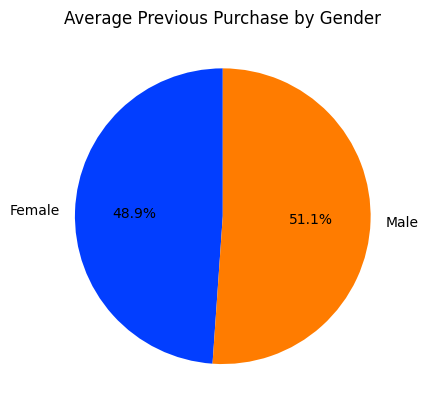

In [33]:
# import library matplotlib dan seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Rata-rata 'Previous Purchases' group by Gender
loyalty = df.groupby('Gender')['Previous Purchases'].mean()
# Mendefinisikan color_palette yang digunakan
palette_color = sns.color_palette('bright') 
# visualisasi data dengan pie chart
loyalty.plot.pie(colors = palette_color, autopct='%1.1f%%', startangle=90)
# Mendefinisikan judul pie chart
plt.title('Average Previous Purchase by Gender')
# Mendefinsiilan ylabel
plt.ylabel('')
# menampilkan pie chart
plt.show()

**Insight:** laki-laki memiliki persentase rata- rata previous purchases lebih tinggi dibandingkan dengan perempuan, hal ini menunjukkan bahwa laki-laki cenderung berbelanja berkali-kali di toko yang sama dibandingkan dengan perempuan, sehingga memberikan insight bahwa target market gender laki-laki lebih loyal dibandingkan dengan perempuan.

### **Mengetahui Target Market yang Memiliki Purchase Amount (USD) Tertinggi**

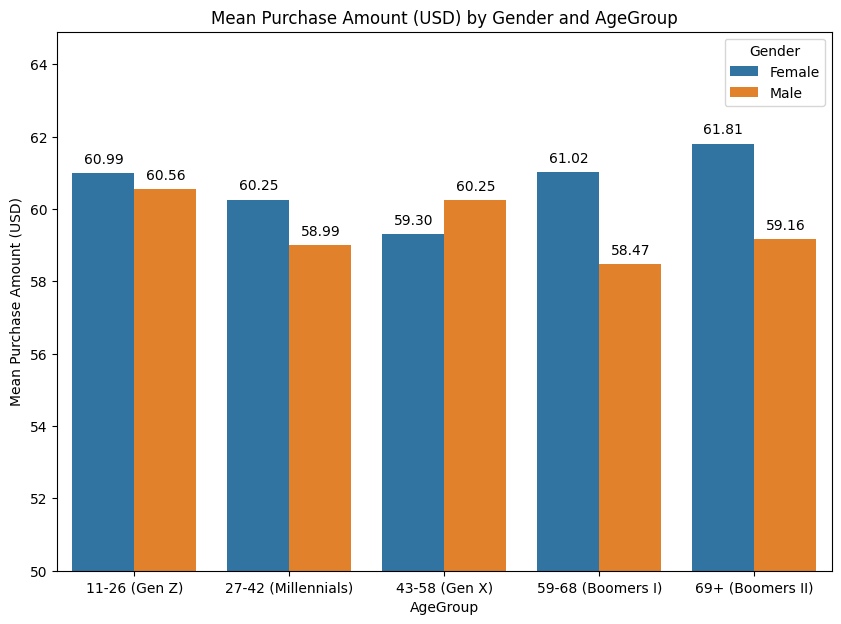

In [34]:
# Mendefinisikan data purchase_gender_age adalah dataframe dengan menunjukkan mean dari purchase amount berdasarkan gender dan age group
purchase_gender_age = df.groupby(['Gender', 'AgeGroup'],observed=False)['Purchase Amount (USD)'].mean().reset_index()
# Mendefinisikan ukuran gambar
plt.figure(figsize=(10, 7))
# barplot didefinisikan sebagai ax
ax = sns.barplot(x='AgeGroup', y='Purchase Amount (USD)', hue='Gender', data=purchase_gender_age)

''' 
pada bagian ini, digunakan untuk menampilkan value dari setiap bar menggunakan for loop untuk value di dalam setiap bar (patch) pada axes (ax).
'''

# Membuat for loop untuk value pada setiap bar
for value in ax.patches:
    # Mendefinisikan tinggi pada setiap bar
    height = value.get_height()
    
    ''' 
    pada bagian ini didefinisikan untuk annotate plot dengan text. Di format dengan value tinggi ditulis dua angka desimal dan convert ke string.
    kemudian mendefinisikan penempatan tulisan di tengah atas setiap bar dengan (value.get_x() + value.get_width() / 2., height). set horizontal
    dan vertical alignment ke tengah. Menentukan point text xytext=(0, 10) dari posisi awal yg di set. terakhir, di spesifikasi bahwa
    koordinat dari text yang ditetapkan relatif pada posisi yang ditentukan.
    '''
    # mendefinisikan value yang ditetapkan pada setiap bar
    ax.annotate(f'{height:.2f}', (value.get_x() + value.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
# Mengatur judul dan lokasi legend
plt.legend(title='Gender', loc='upper right')
# Mengatur judul
plt.title('Mean Purchase Amount (USD) by Gender and AgeGroup')
# menentukan nama xlabel
plt.xlabel('AgeGroup')
# menentukan nama ylabel
plt.ylabel('Mean Purchase Amount (USD)')
# menentukan titik awal y adalah 50
plt.ylim(50)
# menampilkan chart
plt.show()

**Insight:** rata-rata dari purchase amount (USD) tertinggi dimiliki oleh perempuan dengan age group Boomers II, diikuti dengan age group Boomers I, dan age group gen Z. Dapat disimpulkan bahwa perempuan dari ketiga age group tersebut memiliki kemampuan purchase yang cukup tinggi dibandingkan dengan age group lainnya. Hal ini bisa di jadikan target market utama jika ingin menaikkan sales. 

### **Mengetahui preferensi fashion item**

In [35]:
# warna dan ukuran yang paling sering di pilih
mode_size_color = df.groupby('Gender')[['Size', 'Color']].agg(lambda x: x.mode().iloc[0])
mode_size_color

,Size,Color
Gender,,
Female,M,Yellow
Male,M,Silver


**Insight:** Size yang paling banyak dipilih adalah ukuran M sedangkan warna yang paling sering dipilih oleh perempuan adalah kuning dan untuk laki-laki adalah warna silver. 

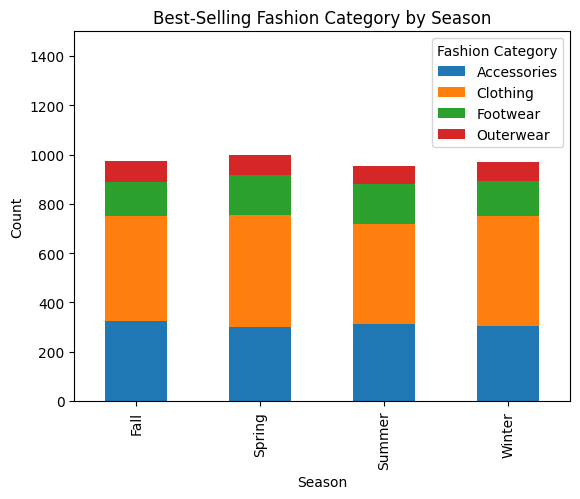

In [36]:
# Best-Selling Fashion Items by Season
best_selling_by_season = df.groupby('Season')['Category'].value_counts().unstack()
# plot dengan chart stacked bar
ax = best_selling_by_season.plot(kind='bar', stacked=True)
# set judul
plt.title('Best-Selling Fashion Category by Season')
# set judul dari legend
plt.legend(title='Fashion Category')
# set nama xlabel
plt.xlabel('Season')
# set nama ylabel
plt.ylabel('Count')
# set range dari ylabel
ax.set_ylim(bottom=0, top=1500)
# tampilkan chart
plt.show()

**Insight:** Terlihat bahwa dari semua musim, fashion category yang paling banyak terjual adalah clothing yang kemudian diikuti oleh accessories. Sehingga, penjualan fashion items dapat difokuskan kepada kedua category tersebut untuk meningkatkan sales. 

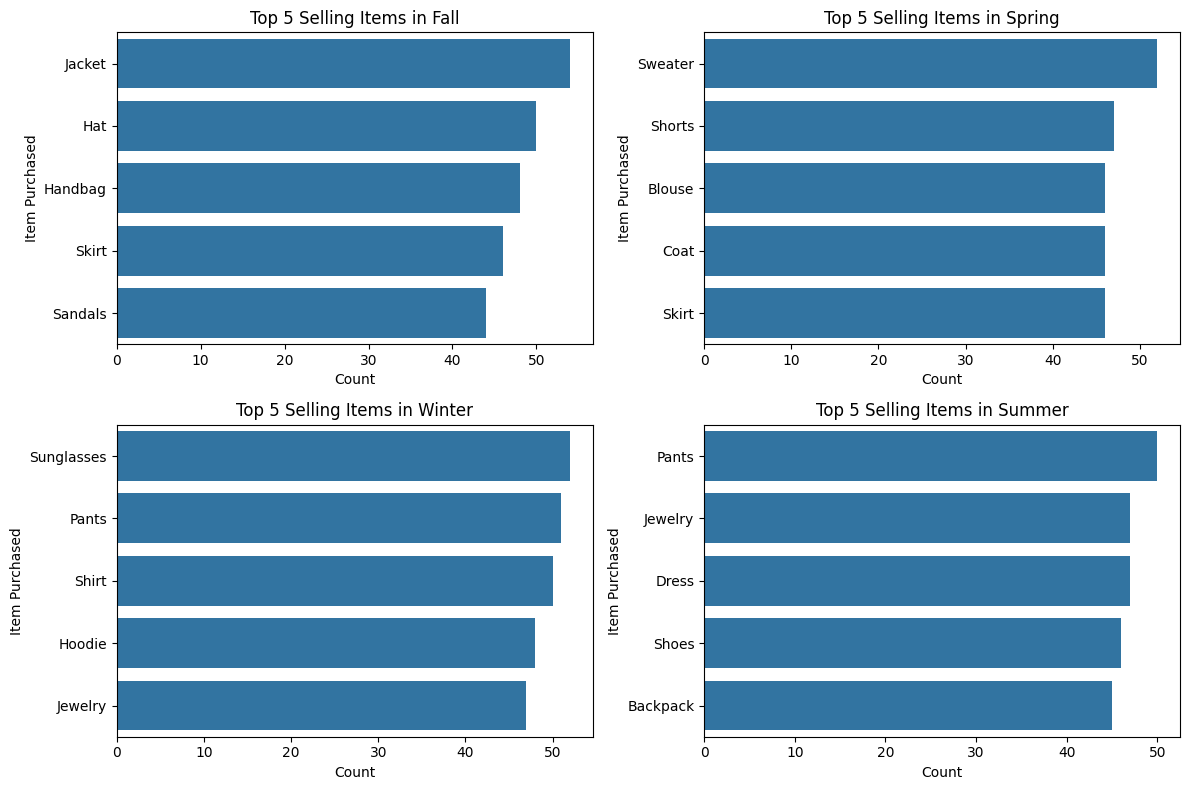

In [37]:
# membuat subplots untuk setiap musim
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten 2D array menjadi 1D array
axes = axes.flatten()

# membuat list seasons
seasons = ['Fall', 'Spring', 'Winter', 'Summer']

# for loop seasons dan axes array
for season, ax in zip(seasons, axes):
    # mendefinisikan selling_by_season dengan kolom season yang di groupkan dengan item purchased
    selling_by_season = df[df['Season'] == season].groupby('Item Purchased').size()
    # sort value descending, reset_index dengan nama count, limit 5 data teratas
    selling_by_season = selling_by_season.sort_values(ascending=False).reset_index(name='Count').head(5)

    # visualisasi barplot dengan seaborn
    sns.barplot(x='Count', y='Item Purchased', data=selling_by_season, ax=ax)
    # set judul
    ax.set_title(f'Top 5 Selling Items in {season}')
    # set label x
    ax.set_xlabel('Count')
    # set label y
    ax.set_ylabel('Item Purchased')


# atur layout agar tidak overlap
plt.tight_layout()
# menampilkan gambar
plt.show()

**Insight:** Visualisasi di atas menunjukkan best selling item pada setiap musim. Pada musim Fall customer paling banyak membeli jaket, pada musim spring customer paling banyak membeli sweater, pada musim winter customer paling banyak membeli sunglasses, pada musim summer customer paling banyak membeli pants. Berdasarkan visualisasi, strategi penjualan pada setiap musim dapat ditentukan berdasarkan best selling item setiap musim.

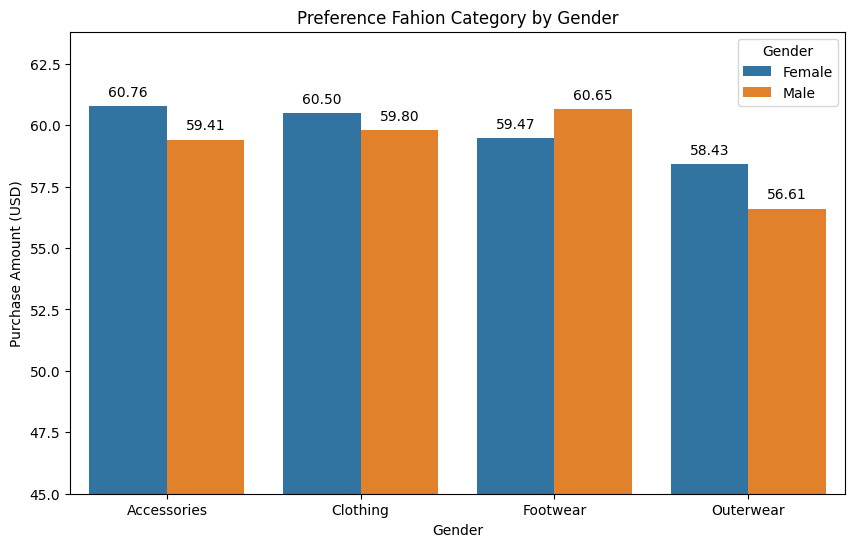

In [38]:
# mendefinisikan dataframe purchase amount (USD) yang digroup dengan Gender dan Category didefinisikan dengan gender_purchase
gender_purchase = df.groupby(['Gender', 'Category',])['Purchase Amount (USD)'].mean().reset_index()

# Mendefinisikan ukuran dari chart
plt.figure(figsize=(10, 6))
# plot menggunakan barplot dengan x sebagai category, y sebagai purchase amount, dan hue sebagai gender
ax = sns.barplot(x='Category', y='Purchase Amount (USD)', hue='Gender', data=gender_purchase)

# Membuat for loop untuk value pada setiap bar
for value in ax.patches:
    # Mendefinisikan tinggi pada setiap bar
    height = value.get_height()
    
    ''' 
    pada bagian ini didefinisikan untuk annotate plot dengan text. Di format dengan value tinggi ditulis dua angka desimal dan convert ke string.
    kemudian mendefinisikan penempatan tulisan di tengah atas setiap bar dengan (value.get_x() + value.get_width() / 2., height). set horizontal
    dan vertical alignment ke tengah. Menentukan point text xytext=(0, 10) dari posisi awal yg di set. terakhir, di spesifikasi bahwa
    koordinat dari text yang ditetapkan relatif pada posisi yang ditentukan.
    '''
    # mendefinisikan value yang ditetapkan pada setiap bar
    ax.annotate(f'{height:.2f}', (value.get_x() + value.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# set judul
plt.title('Preference Fahion Category by Gender')
# set nama xlabel
plt.xlabel('Gender')
# set nama ylabel
plt.ylabel('Purchase Amount (USD)')
# set titik awal sumbu y
plt.ylim(45)
# set judul legend
plt.legend(title='Gender')

# Menampilkan plot
plt.show()


**Insight:** Berdasarkan visualisasi yang didapat, terlihat bahwa pembelian tertinggi berada pada kategori accessories oleh perempuan. Sedangkan untuk gender laki-laki pembelian tertinggi nya ada pada footwear. Pada kedua gender, pembelian tertinggi kedua sama-sama clothing. Dengan visualisasi seperti ini, kemudian dapat ditentukan target market setiap category fashion. 

### **Mengetahui apakah membership memengaruhi loyalty**

In [39]:
# mendefinisikan unique value pada Frequency of purchases
unique_value = pd.unique(df['Frequency of Purchases'].values.ravel('K'))
# menampilkan unique value
print(unique_value)

['Fortnightly' 'Weekly' 'Annually' 'Quarterly' 'Bi-Weekly' 'Monthly'
 'Every 3 Months']


In [40]:
''' 
Dari unique value yang didapat, dari string mau di convert menjadi angka dengan tujuan untuk perhitungan uji hipotesis, sehingga setiap value yang
ditetapkan adalah dianggap jumlah Frequency of purchases dalam setahun.
'''
# replace setiap unique value menjadi value angka
df[['Frequency of Purchases']] = df[['Frequency of Purchases']].replace({'Fortnightly': '26', 'Bi-Weekly' : '26', 'Weekly': '52', 'Annually': '1', 'Quarterly':'4', 'Monthly':'12', 'Every 3 Months' : '4'  }, regex= True)
# mengubah tipe data kolom Frequency of Purchases menjadi integer
df[['Frequency of Purchases']] = df[['Frequency of Purchases']].apply(pd.to_numeric)

H0 = tidak terdapat perbedaan signifikan dalam Frequency of Purchases antara members dan non-members

H1 =  Terdapat perbedaan signifikan dalam Frequency of Purchases antara members dan non-members.

In [41]:
## Two-sample dependent test
# Import library scipy
import scipy.stats as stats

# mendefinisikan non members adalah No pada kolom Subscription Status
non_members = df[df['Subscription Status'] == 'No']['Frequency of Purchases']
# mendefinisikan members pada adalah yes pada kolom Subscription Status
members = df[df['Subscription Status'] == 'Yes']['Frequency of Purchases']

# Menghitung tstatistik dan pvalue dari non_members dan members
t_stat, p_value = stats.ttest_ind(non_members, members)

# Set nilai critical value
alpha = 0.05

# print nilai t statistic
print(f'T-statistic: {t_stat:.4f}')
# print nilai p-value
print(f'P-value: {p_value:.4f}')

# cek apakah pvalue kurang dari nilai critical value
if p_value < alpha:
    print("Menolak hipotesis nol: Terdapat perbedaan signifikan dalam Frequency of Purchases antara members dan non-members.")
else:
    print("Gagal menolak hipotesis nol: tidak terdapat perbedaan signifikan dalam Frequency of Purchases antara members dan non-members.")


T-statistic: -1.0916
P-value: 0.2751
Gagal menolak hipotesis nol: tidak terdapat perbedaan signifikan dalam Frequency of Purchases antara members dan non-members.


**Insight:** Hasil dari uji hipotesis menggunakan Two-sample dependent test adalah hipotesis H0 diterima, yaitu tidak terdapat perbedaan signifikan dalam Frequency of Purchases antara members dan non-members. Sehingga dapat diambil kesimpulan bahwa membership tidak memberikan dampak yang begitu besar untuk revenue.

# Pengambilan Kesimpulan

**Key insights:**
1. **Fokus pada negara Alaska, Arizona, dan Pennsylvania.** Ketiga negara ini mencerminkan high-value customers yang secara sukarela untuk membayar lebih demi fashion item. Company perlu mempertimbangkan ekspansi ke tiga negara ini.
2. **Target laki-laki dalam pembuatan membership.** Laki-laki memiliki kecenderungan untuk berbelanja di tempat yang sama berkali-kali dibandingkan dengan perempuan. Hal ini dapat dimanfaatkan untuk mendorong pembuatan brand membership karena memberikan peluang untuk *deliver* info dan promo menarik kepada members yang mendorong terjadinya transaksi baru oleh customer. 
3. **Fokus kepada perempuan untuk marketing items.** Hal ini karena perempuan lebih cenderung bersedia untuk *spending* lebih pada fashion item ketimbang dengan laki-laki khususnya untuk perempuan dengan age group Boomers II, Boomers I, dan Gen Z. Company perlu mempertimbangkan membuat fashion item untuk ketiga age group dan gender tersebut.  
4. **Ukuran yang paling banyak di beli adalah 'M' untuk kedua gender, sedangkan preferensi warna yang paling banyak dibeli adalah warna kuning untuk perempuan dan warna silver untuk laki-laki.** Berdasarkan fakta ini, company perlu mempertimbangkan untuk memproduksi lebih banyak fashion item yang memiliki warna dan ukuran tersebut. 
5. **Category fashion item yang paling banyak dibeli pada setiap musim adalah clothing.** Company perlu berfokus pada category fashion ini untuk menghasilkan revenue yang tinggi untuk setiap musim.
6. **Pada musim Fall customer paling banyak membeli jaket, pada musim spring customer paling banyak membeli sweater, pada musim winter customer paling banyak membeli sunglasses, pada musim summer customer paling banyak membeli pants.** Company dapat merancang strategi marketing untuk fokus pada penjualan barang tersebut pada setiap musim.
7. **kategori aksesoris, clothing, dan outerwear lebih banyak dibeli oleh customer perempuan, sedangkan footwear lebih banyak dibeli oleh customer laki-laki.** Maka dari itu, company harus melakukan produksi dan penjualan pada setiap kategori dengan target market yang sesuai.
8. **Frequency of Purchases tidak dipengaruhi apakah customer members atau non-members**. Company harus membuat strategi agar members dari brand memengaruhi Frequency of purchase, bisa dengan memberikan promo, info, dan barang eksklusif khusus member.  